In [1]:
import sys
print(sys.version)

3.9.16 (main, Jan 11 2023, 16:05:54) 
[GCC 11.2.0]


In [2]:
import platform
platform.platform()

'Linux-5.15.79.1-microsoft-standard-WSL2-x86_64-with-glibc2.31'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.3


In [4]:
tf.config.get_visible_devices()

2023-02-20 02:23:46.039545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-02-20 02:23:46.064810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-20 02:23:46.065076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


GPU가 있어도 CPU만 사용하도록 설정 (라이브 수강 실습 편의상)

In [5]:
tf.config.set_visible_devices([], device_type='GPU')

# 신경망 리뷰 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
type(train_images)

numpy.ndarray

In [14]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

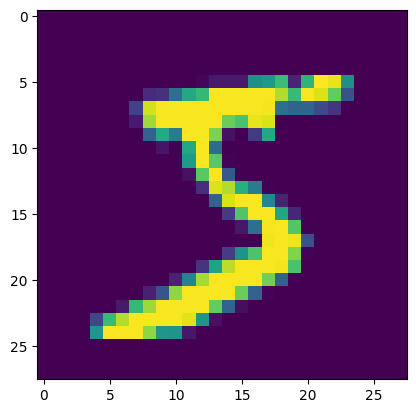

In [15]:
plt.imshow(train_images[0])

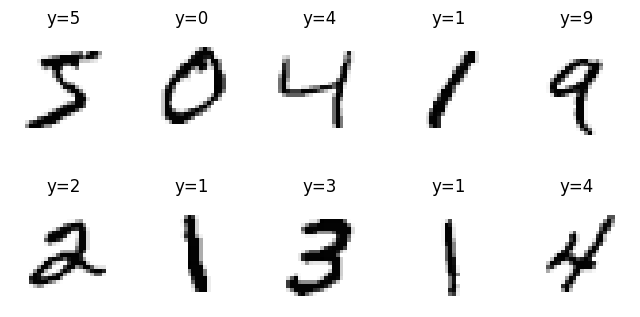

In [20]:
fig, subplots = plt.subplots(2, 5, figsize=(8, 4))
for 표본, 라벨, 그래프 in zip(train_images, train_labels, subplots.ravel()):
    그래프.imshow(표본, 'Greys')
    그래프.set_title(f'y={라벨}')
    그래프.axis('off')

## 손글씨 인식 모형

1. 기계학습
1. 신경망
    1. MLP
    1. ConvNet

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
def 전처리(X):
    X = X.astype('float32')
    X = X.reshape(-1, 28 * 28)
    X /= 255
    return X

In [25]:
X_train = 전처리(train_images)
print(f'{X_train.shape}, {X_train.min()} <= x <= {X_train.max()}')

(60000, 784), 0.0 <= x <= 1.0


In [27]:
X_test = 전처리(test_images)
print(f'{X_test.shape}, {X_test.min()} <= x <= {X_test.max()}')

(10000, 784), 0.0 <= x <= 1.0


In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100.0).fit(X_train, train_labels)

/home/me/.conda/envs/pydeep/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(f'R2(최적화)={logreg.score(X_train, train_labels):.3f}, R2(일반화)={logreg.score(X_test, test_labels):.3f}')

R2(최적화)=0.935, R2(일반화)=0.926


In [37]:
from sklearn.ensemble import RandomForestClassifier

mnist_forest = RandomForestClassifier().fit(X_train, train_labels)

In [38]:
print(f'R2(최적화)={mnist_forest.score(X_train, train_labels):.3f}, R2(일반화)={mnist_forest.score(X_test, test_labels):.3f}')

R2(최적화)=1.000, R2(일반화)=0.967


In [48]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, losses, optimizers

mlp = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp.compile(loss=losses.sparse_categorical_crossentropy, optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = mlp.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.2416 - accuracy: 0.9298
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0983 - accuracy: 0.9713
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0657 - accuracy: 0.9804
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0361 - accuracy: 0.9889


In [49]:
loss, acc = mlp.evaluate(X_test, test_labels)
print(f'정확도={acc:.2%}')

313/313 [==============================] - 0s 747us/step - loss: 0.0738 - accuracy: 0.9784
정확도=97.84%


## TensorFlow API 

### Vector 

In [50]:
x = np.array(range(10))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
x.shape

(10,)

In [53]:
x.ndim

1

In [54]:
x = tf.constant(range(10))
x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [55]:
x.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [56]:
x2 = np.array([[0, 1, 2], [3, 4, 5]])
x2               

array([[0, 1, 2],
       [3, 4, 5]])

In [57]:
tf.constant(x2)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[0, 1, 2],
       [3, 4, 5]])>

In [59]:
x2 * 2

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [60]:
x2 - x2

array([[0, 0, 0],
       [0, 0, 0]])

In [61]:
tf.constant(x2) * 2

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[ 0,  2,  4],
       [ 6,  8, 10]])>

In [62]:
tf.constant(x2) - tf.constant(x2)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[0, 0, 0],
       [0, 0, 0]])>

In [63]:
x1 = tf.constant([[1, 2], [3, 4]])
x2 = tf.constant([[-1, -1], [1, 1]])
tf.matmul(x1, x2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [65]:
np.dot(x1.numpy(), x2.numpy())

array([[1, 1],
       [1, 1]], dtype=int32)

### 경사 하강

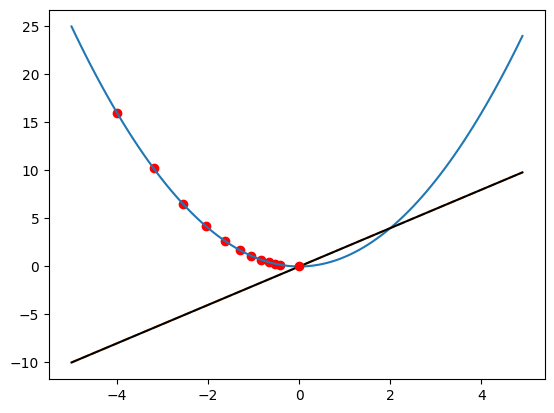

In [80]:
x = np.arange(-5, 5, 0.1)
f = lambda x: x ** 2
dfdx = lambda x: 2 * x

def 수치미분(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / h

def 경사하강(f, 초기값, 학습횟수, 학습률):
    x = 초기값
    x_history = [x]
    for _ in range(학습횟수):
        x = x - 수치미분(f, x) * 학습률
        x_history.append(x)        
    return np.array(x_history)

x_history = 경사하강(f, 초기값=-4, 학습횟수=10, 학습률=0.1)

plt.plot(x, f(x))
plt.plot(x, dfdx(x), '--')
plt.plot(x, 수치미분(f, x), 'k')
plt.scatter(x_history, f(x_history), c='r')
plt.plot(0, 0, 'ro')

In [81]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape:
    y = x ** 2

In [82]:
dydx = tape.gradient(y, x)
dydx

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

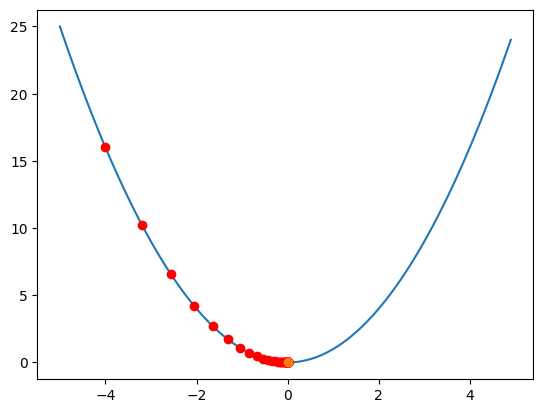

In [89]:
x = tf.Variable(tf.range(-5, 5, 0.1))
f = lambda x: x ** 2

def 경사하강(f, init_x, lr=0.01, step_num=100):
    x = tf.Variable(init_x)
    x_history = [tf.constant(x)]
    for i in range(step_num):
        with tf.GradientTape() as tape:
            y = f(x)
        grad = tape.gradient(y, x)
        x.assign_sub(lr * grad)
        x_history.append(tf.constant(x))
    return tf.constant([xi.numpy() for xi in x_history])

x_history = 경사하강(f, init_x=tf.constant(-4.0), lr=0.1, step_num=100)
plt.plot(x.numpy(), y.numpy())
plt.plot(x_history.numpy(), f(x_history).numpy(), 'ro')
plt.plot(0, 0, 'o')
plt.show()

w=[0.98205176], b=-0.0672535730320928


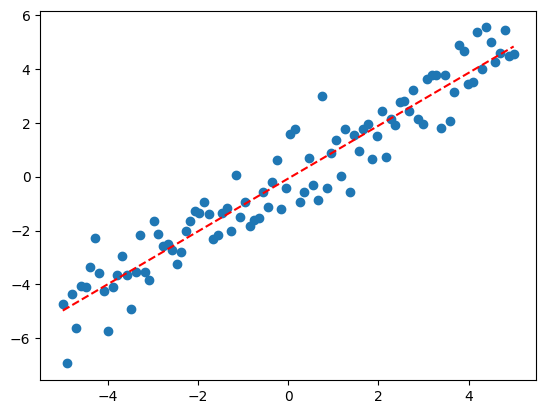

In [100]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

X = x.reshape(-1, 1)
linreg = LinearRegression().fit(X, y)
w = linreg.coef_
b = linreg.intercept_
print(f'w={w}, b={b}')

plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

In [121]:
class TFLinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        
    def predict(self, X):
        return tf.matmul(X, tf.expand_dims(self.w, axis=-1)) + self.b
    
    def 경사산출(self, X, y):
        with tf.GradientTape() as tape:
            Y_pred = self.predict(X)
            y_pred = tf.squeeze(Y_pred)
            # 손실 산출
            loss = tf.reduce_mean((y - y_pred) ** 2)
            
        dw, db = tape.gradient(loss, [self.w, self.b])
        return dw, db
    
    def fit(self, X, y, 학습횟수, 학습률):
        """학습 알고리즘"""
        # 1. 매개변수 초기화
        self.w = tf.Variable(np.zeros(X.shape[-1]), dtype=tf.float32)
        self.b = tf.Variable(0.0, dtype=tf.float32)
        # 2. 최적화 (손실 산출 및 경사 하강)
        for i in range(학습횟수):
            dw, db = self.경사산출(X, y)
            self.w.assign_sub(dw * 학습률)
            self.b.assign_sub(db * 학습률)

In [116]:
tf_linreg = TFLinearRegression()
tf_linreg.w = w
tf_linreg.b = b
assert np.all(tf_linreg.predict(X).numpy().flatten() == linreg.predict(X))

w=[0.98579866], b=0.04786791279911995


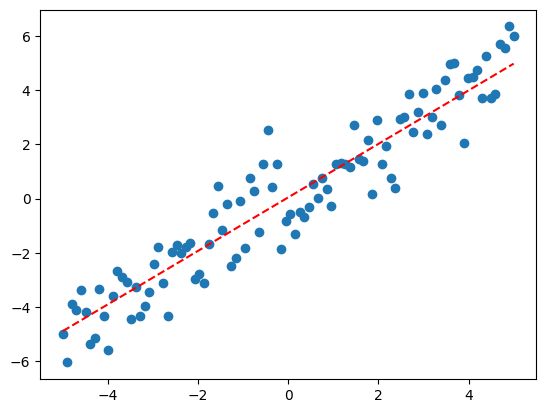

In [127]:
x = np.linspace(-5, 5, 100)
noise = np.random.randn(len(x))
y = x + noise

X = tf.constant(x.reshape(-1, 1), dtype=tf.float32)
                
linreg = TFLinearRegression()
linreg.fit(X, y, 학습횟수=10, 학습률=0.1)
print(f'w={linreg.w.numpy()}, b={linreg.b.numpy()}')

plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

## Keras API

In [134]:
from tensorflow.keras import Sequential, layers, optimizers

linreg = Sequential([layers.Dense(1)])
linreg.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.1))
linreg.fit(X, y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 1ms/step - loss: 19.1807
Epoch 2/10
4/4 [==============================] - 0s 897us/step - loss: 8.7818
Epoch 3/10
4/4 [==============================] - 0s 961us/step - loss: 3.0020
Epoch 4/10
4/4 [==============================] - 0s 877us/step - loss: 3.5000
Epoch 5/10
4/4 [==============================] - 0s 790us/step - loss: 1.1371
Epoch 6/10
4/4 [==============================] - 0s 818us/step - loss: 1.0882
Epoch 7/10
4/4 [==============================] - 0s 817us/step - loss: 1.1286
Epoch 8/10
4/4 [==============================] - 0s 929us/step - loss: 1.1214
Epoch 9/10
4/4 [==============================] - 0s 884us/step - loss: 2.4187
Epoch 10/10
4/4 [==============================] - 0s 872us/step - loss: 1.5033


4/4 [==============================] - 0s 725us/step


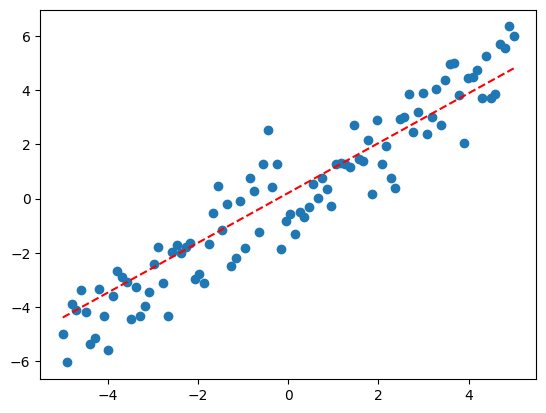

In [135]:
plt.scatter(x, y)
plt.plot(x, linreg.predict(X), 'r--')

## 신경망 간단한 모형 예시

1. 분류
1. 회귀

In [137]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [138]:
train_images.shape

(60000, 28, 28)

In [139]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

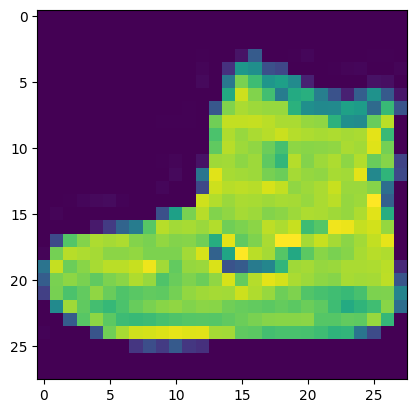

In [140]:
plt.imshow(train_images[0])

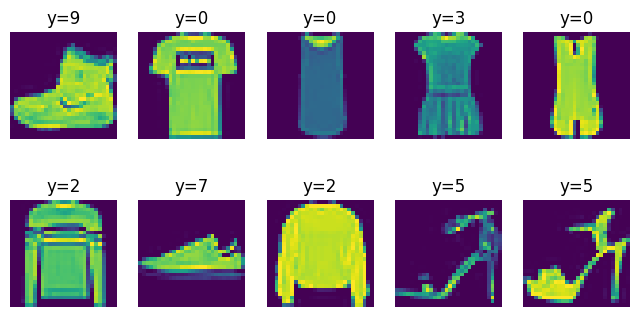

In [145]:
fig, subplots = plt.subplots(2, 5, figsize=(8, 4))
for 표본, 라벨, 그래프 in zip(train_images, train_labels, subplots.ravel()):
    그래프.imshow(표본)
    그래프.set_title(f'y={라벨}')
    그래프.axis('off')

In [149]:
from tensorflow.keras import Sequential, layers, losses, optimizers

의류분류기 = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax', name='output')
])

의류분류기.compile(
    loss=losses.sparse_categorical_crossentropy, 
    optimizer=optimizers.SGD(learning_rate=0.1),
    metrics=['acc']
)

X_train = 전처리(train_images)
X_test = 전처리(test_images)

의류분류기.fit(X_train, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 838us/step - loss: 0.6732 - acc: 0.7682
Epoch 2/10
469/469 [==============================] - 0s 840us/step - loss: 0.4776 - acc: 0.8333
Epoch 3/10
469/469 [==============================] - 0s 853us/step - loss: 0.4370 - acc: 0.8472
Epoch 4/10
469/469 [==============================] - 0s 867us/step - loss: 0.4133 - acc: 0.8547
Epoch 5/10
469/469 [==============================] - 0s 827us/step - loss: 0.3945 - acc: 0.8604
Epoch 6/10
469/469 [==============================] - 0s 826us/step - loss: 0.3839 - acc: 0.8632
Epoch 7/10
469/469 [==============================] - 0s 872us/step - loss: 0.3725 - acc: 0.8676
Epoch 8/10
469/469 [==============================] - 0s 833us/step - loss: 0.3645 - acc: 0.8696
Epoch 9/10
469/469 [==============================] - 0s 833us/step - loss: 0.3588 - acc: 0.8716
Epoch 10/10
469/469 [==============================] - 0s 860us/step - loss: 0.3483 - acc: 0.8750
